# Data BPS 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mimg
# from mpl_toolkits import mplot3d
#atau
import mpl_toolkits.mplot3d.axes3d
import seaborn as sb 
import folium 

## Handling NAN

In [5]:
df = pd.read_excel('indo_12_1.xls',
    skiprows = 3,
    skipfooter = 3,
    na_values = '-',
    )
df = df.fillna(0)
df.head()
# df = df.pivot(
# df

,Unnamed: 0,1971,1980,1990,1995,2000,2010
0,Aceh,2008595.0,2611271.0,3416156.0,3847583.0,3930905.0,4494410
1,Sumatera Utara,6621831.0,8360894.0,10256027.0,11114667.0,11649655.0,12982204
2,Sumatera Barat,2793196.0,3406816.0,4000207.0,4323170.0,4248931.0,4846909
3,Riau,1641545.0,2168535.0,3303976.0,3900534.0,4957627.0,5538367
4,Jambi,1006084.0,1445994.0,2020568.0,2369959.0,2413846.0,3092265


# merename NAMA KOLOM Dataframe

In [7]:
df = df.rename(columns={'Unnamed: 0':'Provinsi'})
df.head()

,Provinsi,1971,1980,1990,1995,2000,2010
0,Aceh,2008595.0,2611271.0,3416156.0,3847583.0,3930905.0,4494410
1,Sumatera Utara,6621831.0,8360894.0,10256027.0,11114667.0,11649655.0,12982204
2,Sumatera Barat,2793196.0,3406816.0,4000207.0,4323170.0,4248931.0,4846909
3,Riau,1641545.0,2168535.0,3303976.0,3900534.0,4957627.0,5538367
4,Jambi,1006084.0,1445994.0,2020568.0,2369959.0,2413846.0,3092265


In [64]:
kontenVal = df.iloc[ : , 1:]
kontenVal = np.array(kontenVal)
kontenVal.shape
kontenVal = kontenVal.flatten()

In [11]:
year = df.columns[1:7]
len(year)

6

In [10]:
provinsi = df.iloc[:,0:1]
len(provinsi)

33

## goals: membuat 3d bar dari 6 tahun

x,y,z
dx,dy,dz
#### x : posisi start 33 provinsi (misal 4 prov 1,2,3,4, 1,2,3,4, dst sebanyak tahun kali)
#### y : posisi start 6 tahun
#### z : posisi start di dasar ruangan (defaultnya adalah 0)

#### dx : defaultnya 1
#### dy : defaultnya 1
#### dz : membentuk tinggi -> datanya </p>

In [24]:
 # MEMBUAT DATA X START
    
lenProv = len(provinsi)
lenYear = len(year)
xprov = np.array(list(range(lenProv))*lenYear)
print(xprov)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14
 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32  0  1  2  3  4  5
  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
 21 22 23 24 25 26 27 28 29 30 31 32  0  1  2  3  4  5  6  7  8  9 10 11
 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32  0  1  2
  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32]


In [47]:
# MEMBUAT DATA Y START (1111,2222,3333,4444,5555,6666)
# list(range(lenYear))*lenProv

yearpos = np.array(list(range(lenYear))* lenProv)
yearpos
yyear = yearpos.reshape(lenProv,-1)
yyear
yyear = yyear.T
yyear
yyear = yyear.flatten()
yyear

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [51]:
# MEMBUAT DATA Z START (0,0,0)

zStart = np.zeros(len(year)*len(provinsi))
zStart

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [54]:
# MEMBUAT dx dan dy

dx = np.ones(198)
dy = np.ones(198)


In [65]:
# MEMBUAT LIST of DZ

dz = kontenVal

# dz = []
# for i in range(1,len(df.columns)):
#     for j in list(df.iloc[:,i]):
#         dz.append(j)
# dz=np.array(dz)
# provx

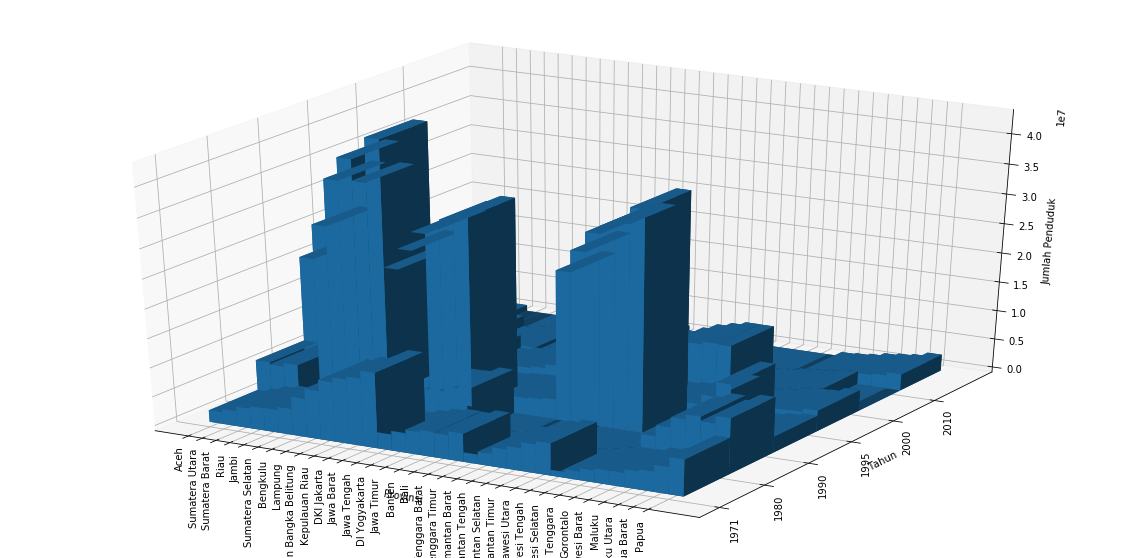

In [70]:
fig = plt.figure(figsize=(20,10))
p = plt.subplot(111, projection='3d')

p.bar3d(xprov,yyear,zStart,dx,dy,dz)
p.set_xlabel('Provinsi')
p.set_ylabel('Tahun')
p.set_zlabel('Jumlah Penduduk')

p.set_xticks(np.arange(len(df['Provinsi'])))
p.set_xticklabels(df['Provinsi'], rotation=90, fontsize=10)

p.set_yticks(np.arange(len(year)))
p.set_yticklabels(year,rotation=90, fontsize=10)

plt.show()

# SATU TAHUN 

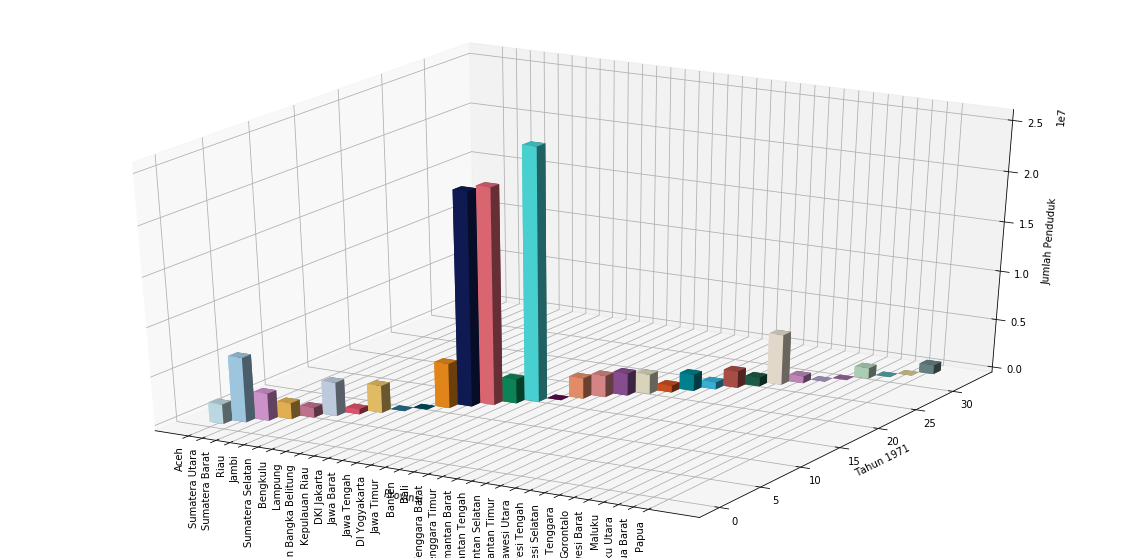

In [72]:
fig = plt.figure(figsize=(20,10))
p = plt.subplot(111, projection='3d') 
x = np.arange(len(df.index)) #data x
# y = np.arange(1)
y = np.arange(len(df.index)) #data y
z = np.zeros(len(df[1980]))

dx = np.ones(len(df.index))
dy = np.ones(len(df.index))
dz = df[1971] #datadz

p.bar3d(x,y,z,dx,dy,dz,color=['#d3f4ff','#b2dffb','#e7a4e4','#ffc55c','#d77fa1','#d6e5fa','#f65c78','#ffd271','#297ca0','#015668','#ff971d','#111d5e','#f67280','#0c9463','#51eaea','#621055','#ff9d76','#f09595','#9656a1','#f4efd3','#e25822','#00909e','#3fc5f0','#bd574e','#1f6650','#fff4e4','#d597ce','#baabda','#eea5f6','#c2e8ce','#5eb7b7','#eadea6','#719192'])

p.set_xlabel('Provinsi')
p.set_ylabel('Tahun 1971')
p.set_zlabel('Jumlah Penduduk')
p.set_xticks(np.arange(len(df['Provinsi'])))
p.set_xticklabels(df['Provinsi'],rotation=90,fontsize=10)
plt.show()

# POKEMON 1000 data pertama, plot di folium, terus ada gambarnya

In [9]:
df1 = pd.read_csv('pokemon-spawns.csv')
df1

,s2_id,s2_token,num,name,lat,lng,encounter_ms,disppear_ms
0,-9185794522947256000,8085808cc6d,13,Weedle,37.793592,-122.408721,1469520187732,1469519919988
1,-9185794529389707000,8085808b51d,16,Pidgey,37.794746,-122.406420,1469520297172,1469519919992
2,-9185794529389707000,8085808b271,41,Zubat,37.794999,-122.404384,1469520709924,1469519919991
3,-9185794082713108000,808580f3587,16,Pidgey,37.795644,-122.407128,-1,1469519920134
4,-9185794076270658000,808580f4b1d,60,Poliwag,37.795592,-122.406331,1469520741876,1469519920153
...,...,...,...,...,...,...,...,...
314100,-9185787356794323000,8085871158f,84,Doduo,37.778626,-122.475958,1469670899836,1469670453557
314101,-9185786935887528000,80858773019,56,Mankey,37.769260,-122.483652,1469671114084,1469670453557
314102,-9185786940182495000,80858772545,29,Nidoran (f),37.768922,-122.483298,1469670572436,1469670453557
314103,-9185787373974192000,8085870d1db,10,Caterpie,37.773062,-122.483387,1469671257676,1469670453556


In [10]:
df1 = df1.head(1000)
lat = df1.lat
long = df1.lng
num = df1.num
# lat
# long
# num

map = folium.Map(
    location = [lat[0],long[0]],
    zoom_start = 15,
    tiles='OpenStreetMap'
)

for i in range(len(num)):
    icon_url= f"https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/back/shiny/{num[i]}.png"
    icon=folium.features.CustomIcon(icon_url,icon_size=(100,100))
    folium.Marker(
    location = [lat[i],long[i]],
    tooltip = f"<img width='200px' src='https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/back/{num[1]}.png'>",
    icon=icon
    ).add_to(map)
    
    
#     folium.Circle(
#     location = [lat[i],long[i]],
#     radius=200,
#     color='magenta',fill=True,fill_color='blue'
#     ).add_to(map) 

    
    
map